In [1]:
#! pip install pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("dataset/phishing_site_urls.csv")

In [6]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [7]:
df.shape

(549346, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [11]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [13]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [15]:
from nltk.tokenize import RegexpTokenizer

In [16]:
tokenizer = RegexpTokenizer(r'[A-Z a-z]+')

In [17]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [18]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [20]:
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [21]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [22]:
from nltk.stem.snowball import SnowballStemmer

In [23]:
stemmer = SnowballStemmer('english')

In [25]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer .stem(word) for word in l])

In [26]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [27]:
df['text'] = df['text_stemmed'].map(lambda l:' '.join(l))

In [28]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [29]:
good_sites = df[df.Label =='good']
bad_sites = df[df.Label =='bad']

In [30]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt, ]","[y, ko, d, l, qt, ]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [33]:
def plot_wordcloud(text, mask=None, max_words=600, max_font_size=120,
                   figure_size=(24.0, 16.0), title=None, title_size=20, image_color=False):

    stopwords = set(STOPWORDS)
    more_stopwords = ['com', 'http']
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        max_words=max_words,
        max_font_size=max_font_size,
        random_state=42,
        mask=mask
    )

    wordcloud.generate(text)
    plt.figure(figsize=figure_size)

    if image_color and mask is not None:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 'verticalalignment': 'bottom'})

    plt.axis("off")
    plt.show()


In [34]:
all_text= ' '.join(good_sites['text'].tolist())

In [38]:
from wordcloud import WordCloud

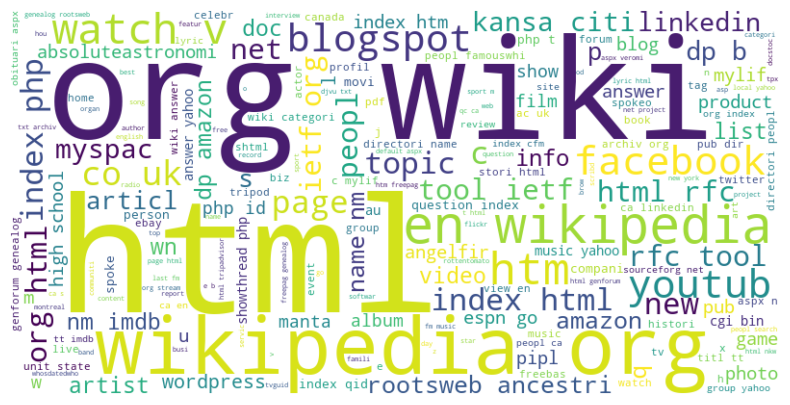

In [39]:
#generate word cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_text)

#display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
all_text= ' '.join(bad_sites['text'].tolist())

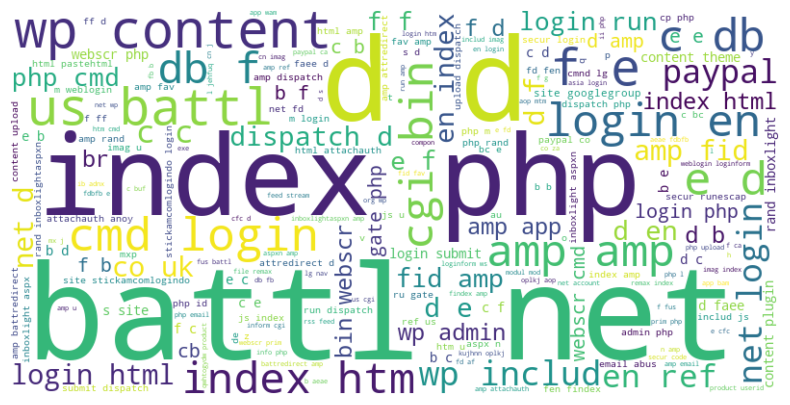

In [41]:
#generate word cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_text)

#display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv= CountVectorizer()

In [50]:
features = cv.fit_transform(df.text)

In [52]:
features[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5, 350866))

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test=train_test_split(features,df.Label,test_size=0.2)

Model training

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
l_model = LogisticRegression()

In [58]:
l_model.fit(x_train,y_train)

C:\Users\kumar\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
l_model.score(x_test,y_test)

0.9650131974151269

In [60]:
l_model.score(x_train,y_train)

0.9787246630077638

In [61]:
from sklearn.metrics import classification_report

In [62]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test),y_test,
                            target_names=['Bad','Good']))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     29433
        Good       0.99      0.96      0.98     80437

    accuracy                           0.97    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.97      0.97    109870



In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
con_mat = pd.DataFrame(confusion_matrix(l_model.predict(x_test), y_test),

columns = ['Predicted: Bad', 'Predicted:Good'],

index= ['Actual: Bad', 'Actual: Good'])

In [69]:
import seaborn as sns


CONFUSION MATRIX


<Axes: >

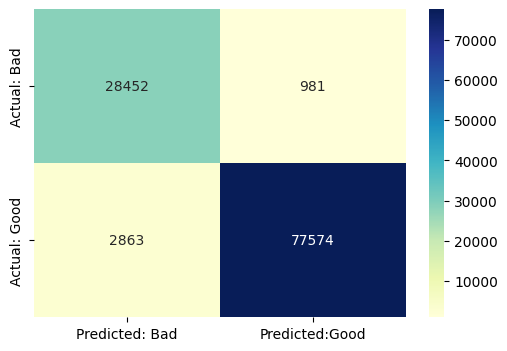

In [70]:
print('\nCONFUSION MATRIX')

plt.figure(figsize= (6,4))

sns.heatmap(con_mat, annot = True, fmt='d',cmap="YlGnBu")

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [73]:
mnb = MultinomialNB()

mnb.fit(x_train,y_train)

In [79]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [80]:
mnb.score(x_test,y_test)

0.9589332847911167

In [81]:
###save model

In [82]:
import pickle

In [83]:
pickle.dump(l_model,open('phishing.pkl','wb'))

In [96]:
pickle.dump(cv,open('phishing_mnb.pkl','wb'))

In [ ]:
pickle.dump(mnb,open('vectorizer.pkl','wb'))

In [88]:
predict_bad = ["yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php", "fazan-pacir.rs/temp/libraries/ipad', 'tubemoviez.exe", "svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt"]


In [87]:
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU', 'retailhellunderground.com/", "restorevisioncenters.com/html/technology.html']

In [89]:
predict_good = cv.transform(predict_good)

In [90]:
predict_bad = cv.transform(predict_bad)

In [92]:
l_model.predict(predict_good)

array(['good', 'good', 'good'], dtype=object)

In [93]:
l_model.predict(predict_bad)

array(['bad', 'bad', 'bad'], dtype=object)

In [94]:
mnb.predict(predict_good)

array(['good', 'good', 'good'], dtype='<U4')

In [95]:
mnb.predict(predict_bad)

array(['bad', 'bad', 'bad'], dtype='<U4')